## 配置颜色条

图例通过离散的标签表示离散的图形元素。然而，对于图形中由彩色的点、线、面构成的连续标签，用颜色条来表示的效果比较好。  
在 `Matplotlib` 里面，颜色条是一个独立的坐标轴，可以指明图形中颜色的含义。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

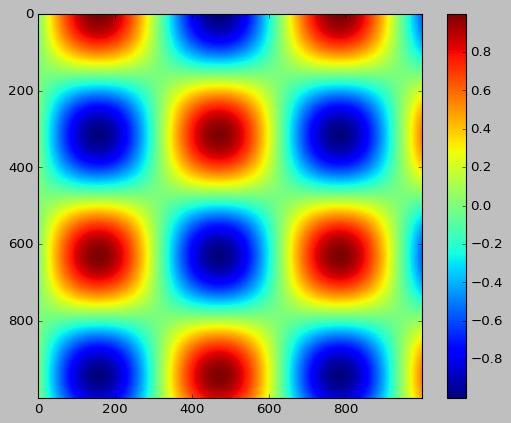

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()  # 通过 plt.colorbar 函数就可以创建最简单的颜色条

## 1. 配置颜色条

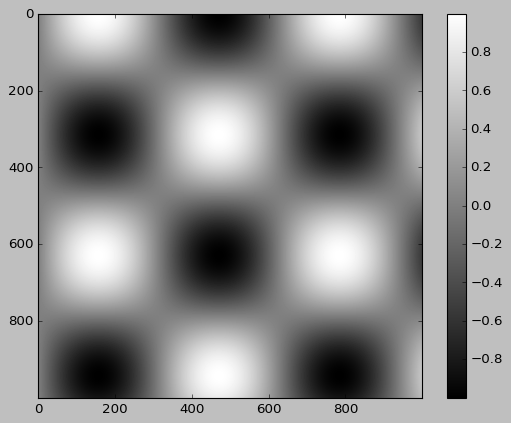

In [3]:
plt.imshow(I, cmap='gray')  # 可以通过 cmap 参数为图形设置颜色条的配色方案
plt.colorbar()

In [4]:
# plt.cm.<TAB>  # 所有可用的配色方案都在 plt.cm 命名空间里面，在 IPython 里通过 Tab 键就可以查看所有的配置方案

有了这么多能够作为备选的配色方案只是第一步，更重要的是如何确定用哪种方案！最终的选择结果可能和你一开始想用的有很大不同。

### 1.1. 选择配色方案

一般情况下，你只需要重点关注三种不同的配色方案。
- 顺序配色方案
    - 由一组连续的颜色构成的配色方案（例如 `binary` 或 `viridis`）
- 互逆配色方案
    - 通常由两种互补的颜色构成，表示正反两种含义（例如 `RdBu` 或 `PuOr`）
- 定性配色方案
    - 随机顺序的一组颜色（例如 `rainbow` 或 `jet`）

`jet` 是一种定性配色方案，曾是 Matplotlib 2.0 之前所有版本的默认配色方案。把它作为默认配色方案实在不是个好主意，因为定性配色方案在对定性数据进行可视化时的选择空间非常有限。随着图形亮度的提高，经常会出现颜色无法区分的问题。  
可以通过把 `jet` 转换为黑白的灰度图看看具体的颜色。

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 将RGBA色转换为不同亮度的灰度值
    # 参考链接 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

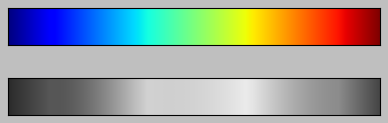

In [6]:
view_colormap('jet')

注意观察灰度图里比较亮的那部分条纹。这些亮度变化不均匀的条纹在彩色图中对应某一段彩色区间，由于色彩太接近容易突显出数据集中不重要的部分，导致眼睛无法识别重点。  
更好的配色方案是 `viridis`（已经成为 Matplotlib 2.0 的默认配色方案）。它采用了精心设计的亮度渐变方式，这样不仅便于视觉观察，而且转换成灰度图后也更清晰：

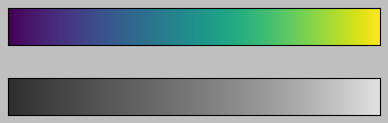

In [7]:
view_colormap('viridis')

如果你喜欢彩虹效果，可以用 `cubehelix` 配色方案来可视化连续的数值：

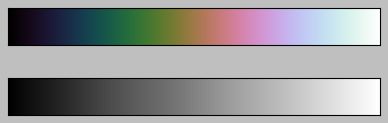

In [8]:
view_colormap('cubehelix')

至于其他的场景，例如要用两种颜色表示正反两种含义时，可以使用 `RdBu` 双色配色方案（红色 - 蓝色，`Red-Blue` 简称）。  
但正如下图所示，用红色、蓝色表示的正反两种信息在灰度图上看不出差别！

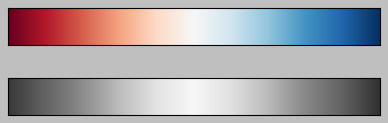

In [9]:
view_colormap('RdBu')

### 1.2. 颜色条刻度的限制与扩展功能的设置

`Matplotlib` 提供了丰富的颜色条配置功能。由于可以将颜色条本身仅看作是一个 `plt.Axes` 实例，因此前面所学的所有关于坐标轴和刻度值的格式配置技巧都可以派上用场。  
颜色条有一些有趣的特性。例如，我们可以缩短颜色取值的上下限，对于超出上下限的数据，通过 `extend` 参数用三角箭头表示比上限大的数或者比下限小的数。

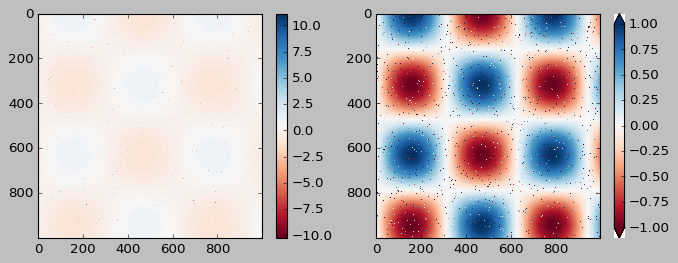

In [10]:
# 这种方法很简单，比如你想展示一张噪点图
# 为图形像素设置1%噪点
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

左边那幅图是用默认的颜色条刻度限制实现的效果，噪点的范围完全覆盖了我们感兴趣的数据。  
而右边的图形设置了颜色条的刻度上下限，并在上下限之外增加了扩展功能，这样的数据可视化图形显然更有效果。

### 1.3. 离散型颜色条

虽然颜色条默认都是连续的，但有时你可能也需要表示离散数据。  
最简单的做法就是使用 `plt.cm.get_cmap()` 函数，将适当的配色方案的名称以及需要的区间数量传进去即可。

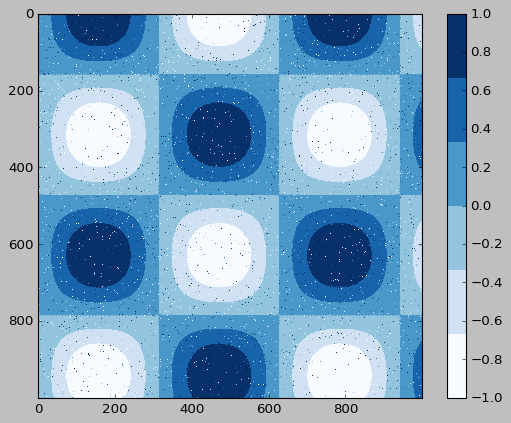

In [11]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## 2. 案例：手写数字

数据在 `Scikit-Learn` 里面，包含近 2000 份 8×8 的手写数字缩略图。

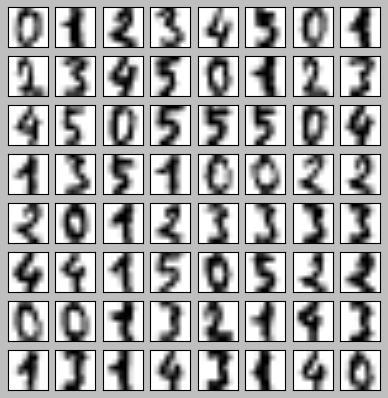

In [12]:
# 加载数字0~5的图形，对其进行可视化
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [13]:
# 将数据保存到本地一份
from sklearn import datasets
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    """将 sklearn.utils.Bunch 转为 pandas.DataFrame"""
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

# df_digits = sklearn_to_df(datasets.load_digits(n_class=6))
# df_digits.to_csv('../data/sklearn_digits.csv')

由于每个数字都由 64 像素的色相（`hue`）构成，因此可以将每个数字看成是一个位于 64 维空间的点，即每个维度表示一个像素的亮度。  
但是想通过可视化来描述如此高维度的空间是非常困难的。一种解决方案是通过降维技术，在尽量保留数据内部重要关联性的同时降低数据的维度，  
例如流形学习（`manifold learning`）。降维是无监督学习的重要内容，5.1 节将详细介绍这部分知识。

暂且不提具体的降维细节，先来看看如何用流形学习将这些数据投影到二维空间进行可视化：

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


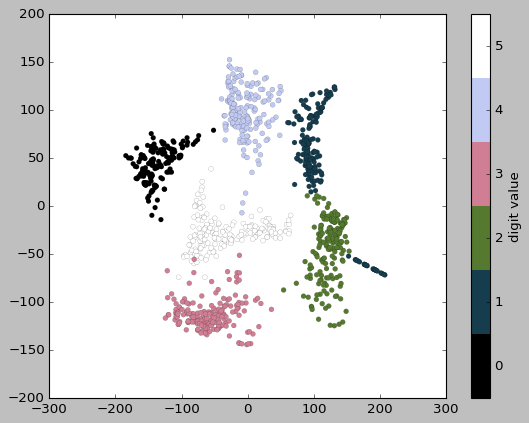

In [14]:
# 用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

# 我们将用离散型颜色条来显示结果，调整 ticks 与 clim 参数来改善颜色条
# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

这个投影结果还向我们展示了一些数据集的有趣特性。例如，数字 5 与数字 3 在投影中有大面积重叠，说明一些手写的 5 与 3 难以区分，因此自动分类算法也更容易搞混它们。  
其他的数字，像数字 0 与数字 1，隔得特别远，说明两者不太可能出现混淆。这个观察结果也符合我们的直观感受，因为 5 和 3 看起来确实要比 0 和 1 更像。